# Chapter 6: Building our First Deep Neural Network: Introducing Backpropagation

## Streetlight problem

So far, we've only been training a neural network to map a single input set to a single output set. While good for learning, this isn't typically how we train neural networks.

We want to train the neural network to *generalize* to a dataset. That is to say, to use lots of different inputs/outputs examples to map a given pattern that mimics the relationship between the inputs and outputs.
* Pixels -> objects
* Weather conditions -> weather prediction
* Purchasing patterns -> Fradulent transactions

We'll start with the books example of learning a streelight pattern. Assume we're in a foreign country and are unfamiliar with the streetlight symbols. Different patterns can mean either WALK or STOP. We're given a sheet giving a few examples and we need to discern the pattern.

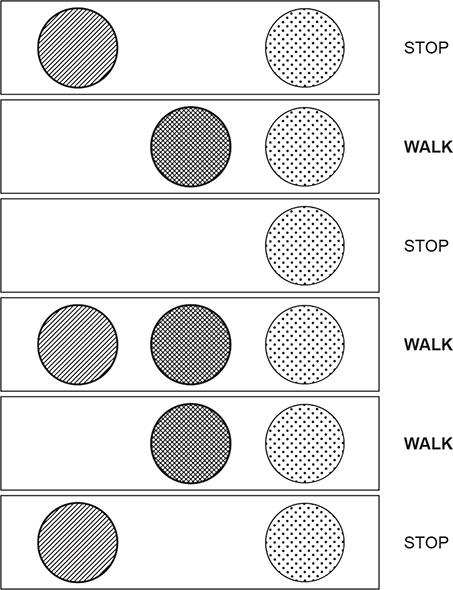

We as humans look for a *correlation* between the input and the output. What do you see in this example?

Since we're told whether the light pattern (the input) means to WALK or STOP (the output), we are using **Supervised Learning** to train the neural network.

In order ot train our neural network, we'll need to convert the data into numeric form.
* Our numeric data can be any real number (although we saw that large numbers tend to cause problems when training our weights)
* For this example, we'll use 1's and 0's to signify whether the light is on or off, respectively.
* We'll also need to assign values for the output. Let's use 0 for STOP and 1 for WALK.
* It's up to us how we want to assign these numeric values, as long as we're consistent.

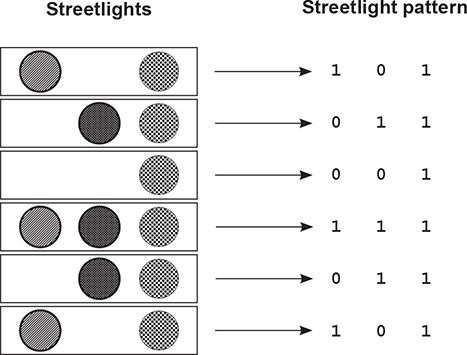 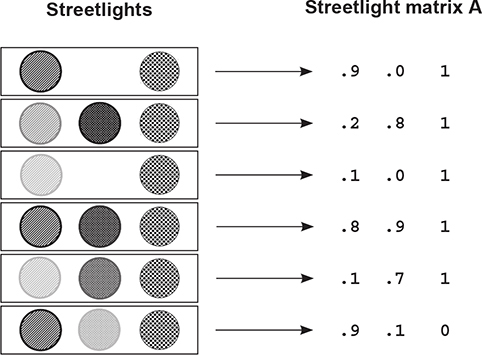 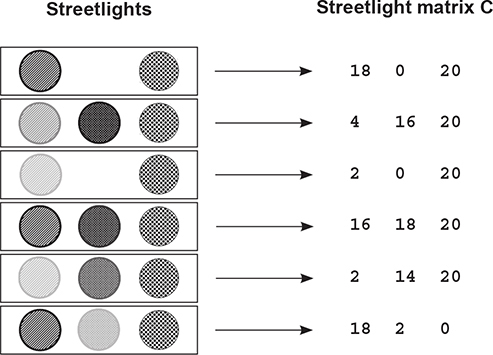

The first example above is an example of *lossless data*. That means it is perfect without any errors in the values. Sometimes we can't get such perfect data, and our values are close but not exact. Our neural networks can still handle this data, but our reults have a similar margin of error. Also, maybe the values represent ranges for values, such as the second image. So long as the values map the relationship in a logically correct way, we can handle them.

More often than not, we'll scale the input to be "reasonably small" so our weight estimation doesn't blow up on us.

Continuing with the streetlight example, let's put the data into matrix form.

In [1]:
import numpy as np

streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ [ 0 ],
                           [ 1 ],
                           [ 0 ],
                           [ 1 ],
                           [ 1 ],
                           [ 0 ] ] ) # Note that newlines are purely visual.

wvs2 = np.array([[0,1,0,1,1,0]]).T
# What is the "shape" or dimensionality of these two matrices?
print(streetlights.shape)
print(walk_vs_stop.shape)
print(wvs2.shape)

(6, 3)
(6, 1)
(6, 1)


In [2]:
# Given what we've learned in previous chapters, let's train a neural network to learn to STOP or WALK

import numpy as np
weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1
for iteration in range(40):
    mse = 0 
    for row in range(len(walk_vs_stop)):
        input = streetlights[row]
        goal = walk_vs_stop[row]

        pred = input.dot(weights)         #could also do np.dot(input, weights); but since input is already an np array we can call this way.

        mse = (pred - goal)**2            #MSE is for analysis of how well training is going
        delta = (pred - goal)
        weights = weights - alpha *(delta * input)
        print(f'Light: {row}, Prediction: {pred}, Goal: {goal}, MSE: {mse}')
    print('\n')
print(weights)


Light: 0, Prediction: -0.19999999999999996, Goal: [0], MSE: [0.04]
Light: 1, Prediction: -0.19999999999999996, Goal: [1], MSE: [1.44]
Light: 2, Prediction: -0.5599999999999999, Goal: [0], MSE: [0.3136]
Light: 3, Prediction: 0.6160000000000001, Goal: [1], MSE: [0.147456]
Light: 4, Prediction: 0.17279999999999995, Goal: [1], MSE: [0.68425984]
Light: 5, Prediction: 0.17552, Goal: [0], MSE: [0.03080727]


Light: 0, Prediction: 0.14041599999999999, Goal: [0], MSE: [0.01971665]
Light: 1, Prediction: 0.3066464, Goal: [1], MSE: [0.48073921]
Light: 2, Prediction: -0.34513824, Goal: [0], MSE: [0.1191204]
Light: 3, Prediction: 1.006637344, Goal: [1], MSE: [4.40543354e-05]
Light: 4, Prediction: 0.4785034751999999, Goal: [1], MSE: [0.27195863]
Light: 5, Prediction: 0.26700416768, Goal: [0], MSE: [0.07129123]


Light: 0, Prediction: 0.213603334144, Goal: [0], MSE: [0.04562638]
Light: 1, Prediction: 0.5347420299776, Goal: [1], MSE: [0.21646498]
Light: 2, Prediction: -0.26067345110016, Goal: [0], MSE:

As before, we notice the output isn't exactly matching, but we can figure we get close enough at a certain point.

## Full, Batch, and Stochastic gradient descent

There are several different methods with their own pros and cons for graining a neural network.
* The one we just used above is an example of **Stochastic Gradient descent**; where we enter in each input one at a time and modify the weights as we proceed.
  * Any idea what the pros/cons might be?
* **Full Gradient Descent** allows us to update weights one dataset at a time.
  * The network calcualtes the average weight_delta over the entire dataset and only changes the weights after the full average is computed.
* **Batch Gradient Descent** splits the difference by updating the weights after getting the average of a subset of the dataset (a batch).
  * We get to choose the size of the batch, but typically in multiples of 8 for faster processing.

## Learning Correlation

Look back at your code and print out the values of the weights and make note. What do you think this means as far as what's important in predicting whether we WALK or STOP?

Weights that have large values (postive or negative) represent where the network *identified correlation* between the input and output.

Values close to 0 mean that have little impact, and are identified as *randomness*.

If we look back again, we note that the error measure between true value and predicted value is shared for all the respective weights. This is the only real *cross communication* we have bewtween them, but it is key to the neural network learning.

**Error attribution** is the idea of identifying which weights contributed to the error, and can therefore be adjusted, while the those that did not contribute to the error can be left alone. As an example, look at the table for the first training sample:

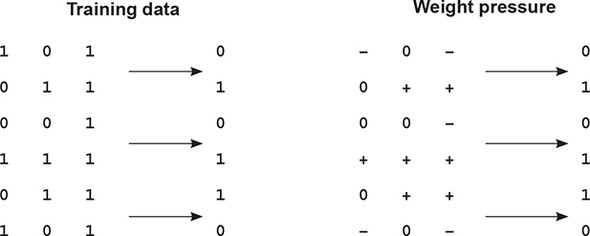

We note that the input values of zero remove any affect of the weight, so only values of 1 are considered. We also note that if we're summing values and trying to get to the true value of zero, then we have negative pressure to pull the weight towards 0. If our true value is 1, then we have positive pressure to push the corresponding weight up towards 1.

We can see that there is conflicting pressure for the left and right weights. Since the center weight is so perfectly correlated, it "absorbs" some of the correlation pressure and allows the stronger of the push/pull to adjust the weights properly. If the center weight was not so perfectly correlated, we may have had more trouble converging to an appropriate set of weights.

Observe the hypothetical below. There is no real correlation between any of the columns and the output and the pressure is even. The neural network really can't learn anything here.

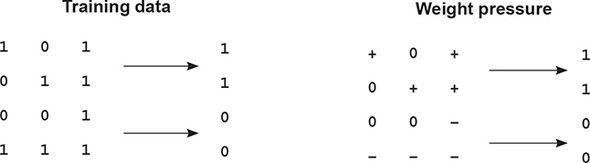

Later we'll talk about *regularization* that will force weights with conflicting pressure towards zero, which is somewhat ideal.

The weighted sum tries to find the perfect correlation between the input and the output.

This example is meant to be a good visual of the process, and we'll see that it can be more nuanced and complex, but this is a good starting point for conceptualizing the process.

## Overfitting

Overfitting is a probably one of the greatest weaknesses of neural networks. The idea is that the neural network learns from the given dataset to perfectly correlate the input and output, but new observations may not match this pattern exactly and we can have poor behavior outside of these samples.

As an example, imagine we only trained our neural network with the first observation, with input [1, 0, 1] and output 0. Now assume the weights were trained to [-0.5, 0, 0.5]. This perfect predicts the output with zero error.

Now, what happens if we try our second input sample of [ 0, 1, 1 ] with output 1? Our prediction with the weights is 0.5. Literally bewteen 0 and 1, which might as well be a coin flip. Training with just the first observation led us to overfit the neural network and not generalize to the population.

An important note from this is that there may be multiple weight configurations (perhaps near infinite) for correlating input to output; depending on the starting weights, our neural network may find a smaller subset of them, or maybe just 1.

The more valid examples we have to learn from, the more likely our neural network won't overfit.
Also, we know it takes many iterations for our weights to converge. Another method of avoiding overfitting is to quit early.

## Learning Indirect Correlation

We're going to extend the idea of finding correlation between input and output by adding in the idea of layers in our network.

If we can't find correlation between input and output directly, we might find interactions between the input that does.

By adding intermediate layers, we're creating new data that may have correlation with the output.

In the visual below, the output from the middle layer is the *intermediate dataset*. We'll see if we can find any correlation between the input and layer1 and then also layer1 with the output.

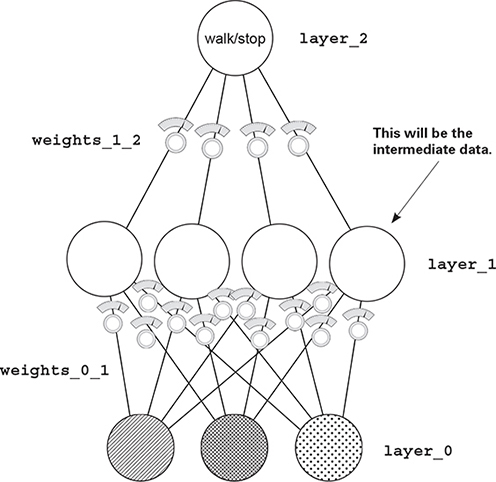

## Backpropagation: Long-distance Error Attribution

Now, we have the extended goal of determining how the weights from the first layer (layer_1) attributed to the error at the output layer (layer_2). This is still possible through **Backpropagation**.

** Side note ** Neural networks have been around since the 50s, but they stalled when they hit certain problems when there was no direct correlation between input and output (see the XOR problem). When multiple layers with backpropagation were introduced, this opened up neural networks to be used as they are today.

Oddly enough, the concept is fairly straight forward: The larger the weight is, the more it contributed to the overall error.
  * Think of a weight from layer_1 being zero (as an extreme). How much did it contribute to any of the calculations?

To simplify, this means the weights from the earlier layers describe exactly how much each earlier node contributed to the output layer prediction, and correspondingly, the error.

We apply this idea by multiplying the delta computed from layer_2 by each of the respective weights in layer_1 to get layer_1 deltas; like reversed prediction logic. This *propagates* the dealta signal *backwards*.

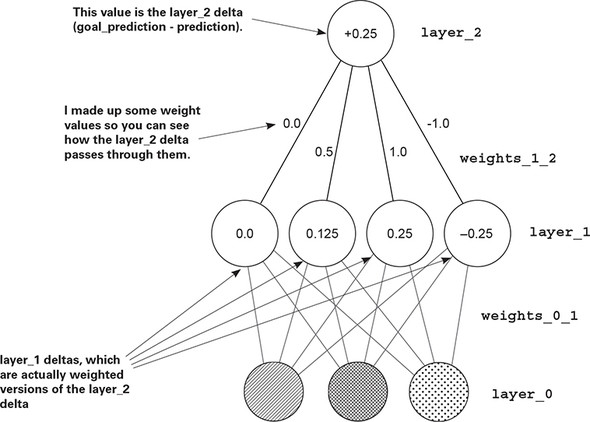

Why does this work? When we only had one layer, the delta told us the direction and amount to move the weights.

"All backpropagation lets you do is say, “Hey, if you want this node to be x amount higher, then each of these previous four nodes needs to be x*weights_1_2 amount higher/lower, because these weights were amplifying the prediction by weights_1_2 times.”"

Let's see a visualization here: https://hmkcode.com/netflow/

Explanation here: https://hmkcode.com/ai/backpropagation-step-by-step/

Helpful Video from 3Blue1Brown: https://youtu.be/Ilg3gGewQ5U

## Linear vs. Nonlinear

Oddly enough, our neural nets won't always have their weights converge properly just yet. We have a problem with conflicting pressures form different training samples, and then also that different weight configurations exist for certain samples, and not others. We need to add one more piece to the puzzle to get it to train properly.

*Problem*: For any two consecuritive weights sums of the input, there is a single weighted sum with the exactly identical behavior.

1 * 10 * 2 = 100; 5 * 20 = 100

1 * 0.25 * 0.9 = 0.225; 1 * 0.225 = 0.225

*What does that mean*: Anything that a three-layer network can do, a two-layer network can do.

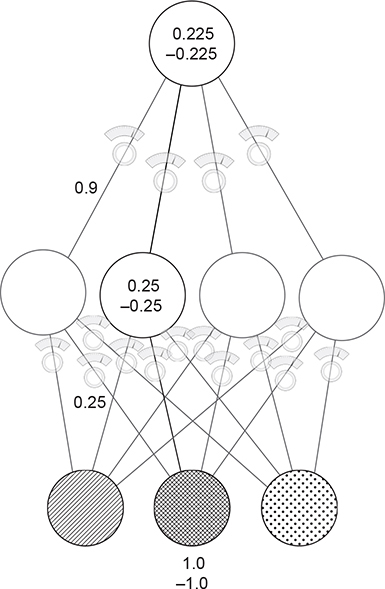
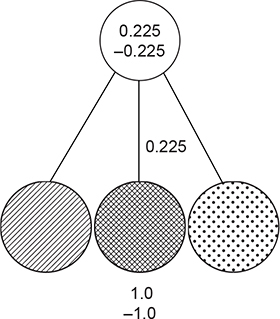

*Why is that a problem*: We mentioned that the XOR problem couldn't be solved with a linear "decision boundary", that is essentially what a single layer neural network can do; draw a line where the outputs are on the line, or if we're doing classification, one class is on one side, and the other class is on the other. By adding more layers, we want to create new correlations within the input variables that creates more complex decision boundaries. But, as the problem statement above mentions, add the extra layer doesn't select different correlations between inputs, it simply "rewires" it to gives the same behavior, it's just more complex, but has the same behavior.

Adjusting the weights to reduce the error over a series of training examples ultimately searches for correlation between the input and the output layers. If no correlation exists, then the error will never reach 0.

What we want is to selectively use only the correlation that gives us information in correctly predicting the output. This is called **conditional** or **sometimes correleation**.

*How can we fix this*: We'll turn off nodes when the value would be below zero.

This essentially removes any negative correlation, and we're only left with positive correlations. With this implemented, imagine where we have two nodes, a left and a right. The left node weight is 1.0 and the weight to the right is a huge negative number. When both are 'off', then the node output will be 0. If only the left node is on, then the output will be value of the left node. This is *conditional correlation*.

*How does that help?* By turning off any middle node whenever it would be negative, you allow the network to sometimes subscribe to correlation from various inputs. This is impossible for two-layer neural networks, thus adding power to three-layer nets. This power is **nonlinearity**.

*Well hold on, why did our neural network with the streetlights work before?* Our first example worked because the middle input was perfectly correlated with the output. If that wasn't the case, then our neural network wouldn't converge.

We call this new form of output a **Rectified Learning Unit** or ReLU for short. We'll see that it's generally restricted to middle/hidden layers.

## Coding up a fully functional multilayered neural network.

In [ ]:
# Use this space to double check your own work for the hmkcode
import numpy as np
input = np.array( [[2,3]] )

goal_pred = 1

alpha = 0.05
hidden_size = 2

weights_0_1 = np.array([[0.11,0.12],
                        [0.21,0.08]])

weights_1_2 = np.array([[0.14],[0.15]])

for iteration in range(2): # Change the number for desired iterations.
    layer_1 = np.dot(input,weights_0_1)
    
    output = np.dot(layer_1,weights_1_2)

    error = np.sum((output - goal_pred) ** 2)

    layer_2_delta = (output - goal_pred)
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)

    weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 -= alpha * input.T.dot(layer_1_delta)

    if(iteration % 10 == 0):
        print("Error:" + str(error))
print(weights_0_1)
print(weights_1_2)

In [ ]:
import numpy as np

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

# Complete the code for a multilayered network with dataset



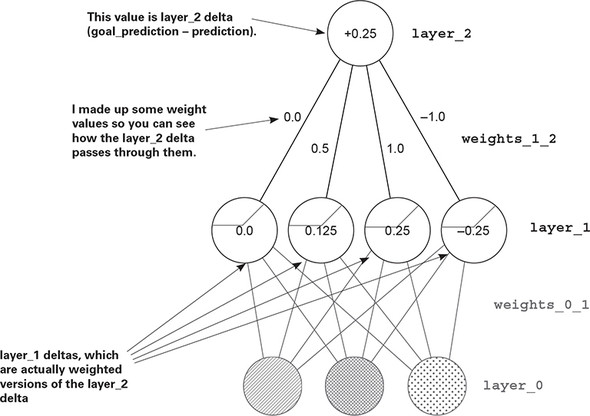

## Why Deep Networks Matter

As we've seen certain problems just don't work with linear functions. Deep networks allow us to use conditional correlation that allow us to train our networks to solve more complex problems.

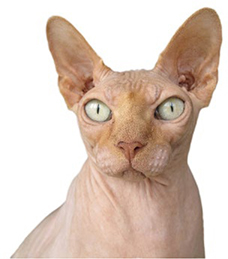

As an example images use pixel data, which we use to make classifications with neural networks. No one pixel is going to perfectly correlate with a class of objects, we need a neural network to be more nuanced. Deep networks allow us to do that.